In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [4]:
path = './data/Trainingsmodus_mit_return_None_nur_bei_end_of_episode_mit_score_speichern'

In [14]:
with open('{}/game.log'.format(path), 'r') as f:
    game_log = f.read()

shape = (2000, 4) #(3000, 4)

(3143, 4)


In [17]:
scores_log = np.zeros(shape)
names = ['<cbt_agent>', '<simple_agent_0>', '<simple_agent_1>', '<simple_agent_2>']
#point_actions_ = ['picked up coin', 'blown up by agent', 'slow']
point_actions = ['and receives', '> receives', 'loses 1 point']
rewards = [1, 5, -1]

try:
    scores_log = np.loadtxt('{}/score_game_log.txt'.format(path))
except:
    start_time = time.time()
    for i in range(shape[0]):
        start = game_log.find('INFO: STARTING ROUND #{}'.format(i+1))
        end = game_log.find('INFO: STARTING ROUND #{}'.format(i+2))
        current_round = game_log[start:end]
        pos1 = 0
        pos2 = 0
        while(pos1 != -1):
            pos1 = current_round.find('[BombeRLeWorld] INFO:', pos2)
            pos2 = current_round.find('[BombeRLeWorld] INFO:', pos1 + 1)
            line = current_round[pos1:pos2]
            for j in range(3): # which reward
                tmp = line.find(point_actions[j])
                if(tmp != -1):
                    for k in range(4): # which agent gets a reward
                        agent = line.find(names[k])
                        if(agent != -1):
                            scores_log[i, k] += rewards[j]
                            break
                    break

    end_time = time.time()
    print('Duration: {}s'.format(np.round(end_time - start_time, 1)))

    np.savetxt('{}/score_game_log.txt'.format(path), scores_log, fmt = '%i')

(3143,)


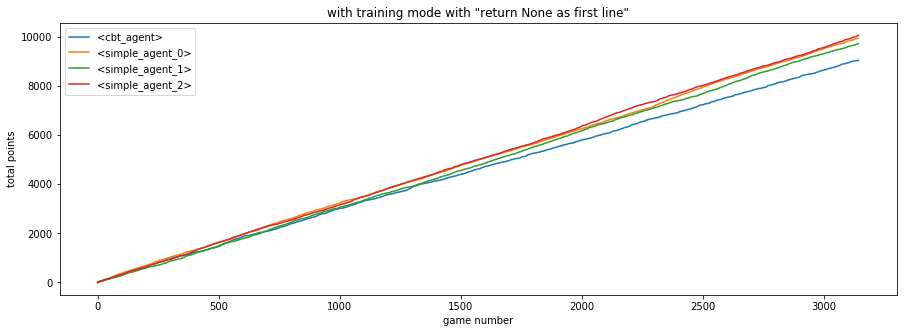

In [22]:
data = np.cumsum(scores_log[:].T, axis = -1)

plt.figure(figsize = (15, 5))
for i in range(4):
    plt.plot(data[i], ls = '-', label = names[i])    #, marker = '.', ms = '2'
plt.legend()
plt.xlabel('game number')
plt.ylabel('total points')
plt.title('with training mode with "return None as first line"')
plt.savefig('{}/total_points.png'.format(path), format = 'png')